In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

In [3]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [4]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_study=pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [78]:
duplicates=mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [80]:
clean_mice=mouse_study[mouse_study['Mouse ID'].isin(duplicates)==False]
clean_mice
clean=mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
drug_regimen=clean_mice.set_index('Drug Regimen').groupby(['Drug Regimen'])
tumor_mean=drug_regimen['Tumor Volume (mm3)'].mean()
tumor_median=drug_regimen['Tumor Volume (mm3)'].median()
tumor_variance=drug_regimen['Tumor Volume (mm3)'].var()
tumor_std=drug_regimen['Tumor Volume (mm3)'].std()
tumor_sem=drug_regimen['Tumor Volume (mm3)'].sem()

In [95]:
summary_stat=pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_variance,
    "Std. Dev.": tumor_std,
    "Std. Error": tumor_sem
})
summary_stat

,Mean,Median,Variance,Std. Dev.,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
summary_data=clean_mice.groupby(['Drug Regimen']).count()['Mouse ID']
summary_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

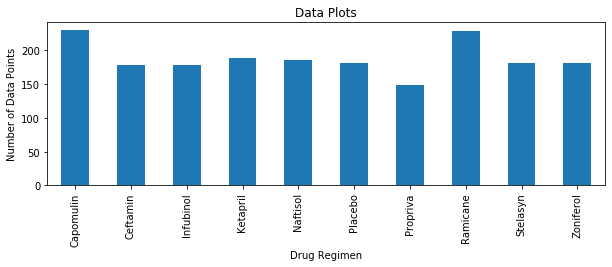

<Figure size 432x288 with 0 Axes>

In [99]:
summary_data.plot(kind="bar", figsize=(10,3))
plt.title("Data Plots")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()


In [100]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


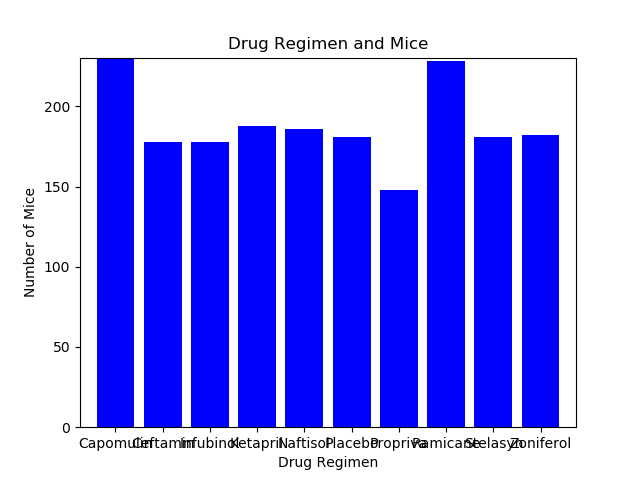

Text(0, 0.5, 'Number of Mice')

In [127]:
drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182 ]
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice)+0.4)
plt.title("Drug Regimen and Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")